<a href="https://colab.research.google.com/github/italomarcelogit/scripts-diversos/blob/master/Data_Visualization_Anota%C3%A7%C3%B5es_em_gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando gráfico com anotações sobre os valores**

**Gerando dados fictícios**


In [11]:
import numpy as np
import pandas as pd

x = list(range(10))
y = np.exp(x)
notas = [[6, 400], [7, 1150], [8, 3000]]
print(pd.DataFrame({'x': x, 'y':y}))


   x            y
0  0     1.000000
1  1     2.718282
2  2     7.389056
3  3    20.085537
4  4    54.598150
5  5   148.413159
6  6   403.428793
7  7  1096.633158
8  8  2980.957987
9  9  8103.083928


# **Matplotlib**

In [2]:
import matplotlib.pyplot as plt

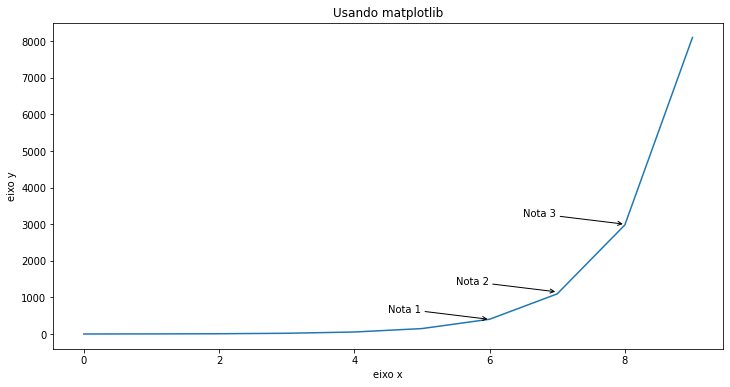

In [3]:
plt.figure(figsize=(12, 6))


plt.plot(x, y)
plt.title('Usando matplotlib')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
for i, v in enumerate(notas):
  plt.annotate(f'Nota {i+1}', xy=(v[0], v[1]),
              arrowprops=dict(arrowstyle='->'),
              xytext=(v[0]-1.5, v[1]+200))

plt.show()

# **Plotly**

In [10]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))
for i, v in enumerate(notas):
  fig.add_annotation(x=v[0], y=v[1],
              text=f"Nota {i+1}",
              showarrow=True,
              arrowhead=1)

fig.update_layout(showlegend=False, template='plotly_white',
                  title='Usando plotly', width=900, height=600)

fig.show()

# **Seaborn**

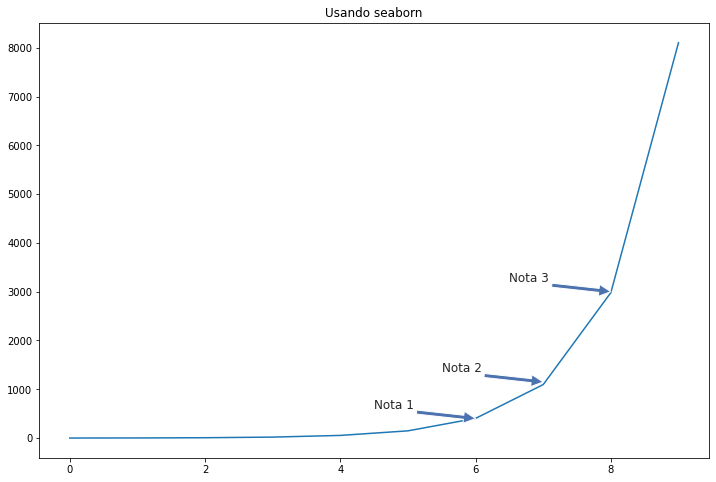

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(x=x, y=y, ax=ax, palette='rocket').set_title('Usando seaborn')
sns.set_theme(style="white")

for i, v in enumerate(notas):
  # plt.text(v[0], v[1], f'Nota {i+1}')
  ax.annotate(f'Nota {i+1}', xy=(v[0], v[1]),
              arrowprops={},
              xytext=(v[0]-1.5, v[1]+200))
plt.show()

# **Bokeh**

In [6]:
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.models import Arrow, NormalHead
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()


p = figure(plot_width=800, plot_height=400,
           title='Usando bokeh')
p.line(x, y)
vx, vy, vt = [], [], []
for i, v in enumerate(notas):
  vx.append(v[0]-1.5)
  vy.append(v[1]+200)
  vt.append(f'Nota {i+1}')
  p.add_layout(Arrow(end=NormalHead(fill_color="lightblue"),
                     x_start=v[0]-0.75, 
                     y_start=v[1]+400, 
                     x_end=v[0], 
                     y_end=v[1]))

dadosNotas = ColumnDataSource(data=dict(vx=vx, vy=vy, vt=vt))
labelNotas = LabelSet(x='vx', y='vy', text='vt',
              x_offset=5, y_offset=5, source=dadosNotas, render_mode='canvas')

p.add_layout(labelNotas)

show(p)

# **Altair**

In [7]:
import altair as alt

df = pd.DataFrame({'x': x, 'y':y})
df['vt'] = ''
for i, v in enumerate(notas):
  df.loc[v[0], 'vt'] = f'Nota {i+1}'
dados = alt.Chart(df).mark_line(point=True).encode(
    x='x', 
    y='y'
)

textos = dados.mark_text(
    align='left',
    baseline='middle',
    fontSize = 15,
    dx = 7
).encode(
    x='x',
    y='y',
    text='vt'
)

alt.layer(dados, textos).configure_view(stroke='transparent').properties(
    width=700,
    height=300,
    title='Usando altair'
).configure_axis(
    grid=False)


alt.LayerChart(...)